In [27]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
feature_vectors = pd.read_csv("tarcutta-only.csv")

In [21]:
feature_vectors = feature_vectors.iloc[:, 0:13].values
feature_vectors

array([[0.56667704, 0.90019576, 0.68971488, ..., 0.50272308, 0.44186267,
        0.50741747],
       [0.3348864 , 0.77528576, 0.76693198, ..., 0.53335315, 0.4911568 ,
        0.56426939],
       [0.15861994, 0.61155169, 0.85698948, ..., 0.54781044, 0.51829908,
        0.54741011],
       ...,
       [0.4298112 , 0.10264431, 0.45110749, ..., 0.73993215, 0.1563399 ,
        0.87026903],
       [0.15461524, 0.2779629 , 0.61926013, ..., 0.63192373, 0.3889284 ,
        0.51485674],
       [0.15974908, 0.54012729, 0.6434727 , ..., 0.6287637 , 0.50457114,
        0.59357896]])

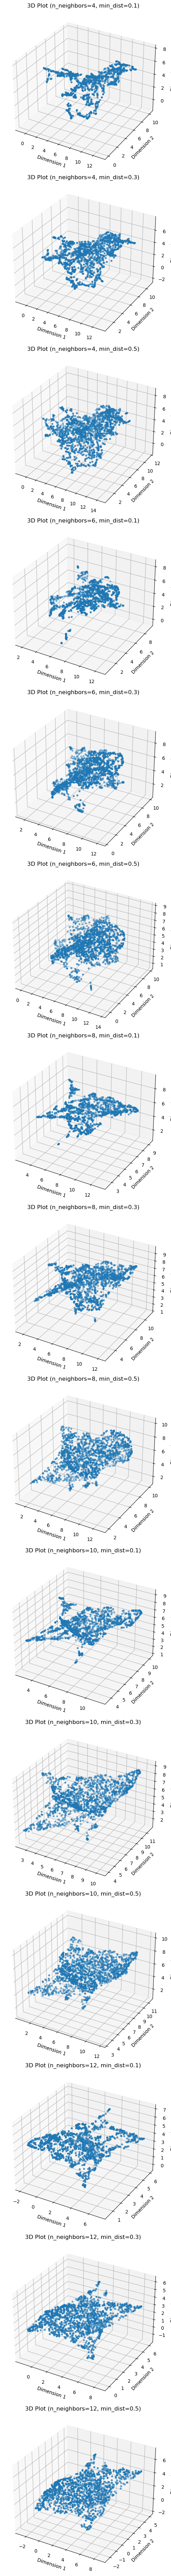

In [22]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the parameter values to iterate over
n_neighbors_values = [4, 6, 8, 10, 12]
min_dist_values = [0.1, 0.3, 0.5]

# Calculate the number of subplots
num_subplots = len(n_neighbors_values) * len(min_dist_values)

# Create a figure and subplots
fig = plt.figure(figsize=(10, 5*num_subplots))

# Iterate over the parameter combinations
for i, (n_neighbors, min_dist) in enumerate([(n, m) for n in n_neighbors_values for m in min_dist_values]):
    # Create a UMAP object with desired parameters
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=3,
        random_state=0
    )

    # Fit the UMAP model to the data
    embedding = reducer.fit_transform(feature_vectors)


    # Create a 3D plot
    ax3d = fig.add_subplot(num_subplots, 1, i+1, projection='3d')
    ax3d.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=10)
    ax3d.set_title(f"3D Plot (n_neighbors={n_neighbors}, min_dist={min_dist})")
    ax3d.set_xlabel('Dimension 1')
    ax3d.set_ylabel('Dimension 2')
    ax3d.set_zlabel('Dimension 3')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


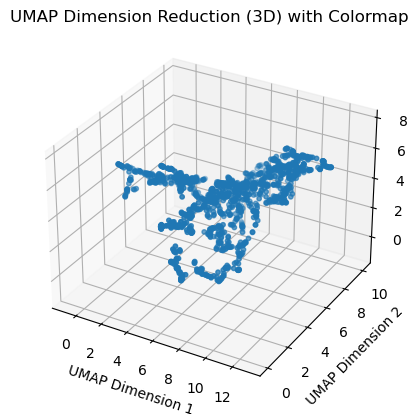

In [24]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data stored in a variable called "data"
# Make sure your data is in the shape of (n_samples, n_features)
# Assuming you have a column of labels stored in a variable called "labels"

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_components=3, random_state=0, n_neighbors=4, min_dist=0.1)

# Perform dimension reduction
embedding = reducer.fit_transform(feature_vectors)

# Plot the reduced dimensions in a 3D scatterplot with colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=10)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('UMAP Dimension Reduction (3D) with Colormap')


plt.show()


In [25]:
import numpy as np
np.savetxt("umap-new-samples-t0.csv", embedding, delimiter=",", header="x, y, z")

move files to different folder location

In [19]:
import os
import csv
import shutil

def move_files_from_csv(csv_file, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read the CSV file
    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row if present

        for row in csv_reader:
            file_name = row[0]  # Assuming the file names are in the first column

            # Check if the file exists in the source folder
            source_file = os.path.join(source_folder, file_name)
            if os.path.isfile(source_file):
                # Move the file to the destination folder
                destination_file = os.path.join(destination_folder, file_name)
                shutil.move(source_file, destination_file)
                print(f"Moved {file_name} to {destination_folder}")

# Example usage
csv_file = 'C:\\Users\\Thomas\\AudioHandling\\39-features-new-samples-all.csv'  # Path to the CSV file
source_folder = 'D:\\PhD-data\\new-samples-audio-mp3'  # Path to the folder containing the sound files
destination_folder = 'D:\\PhD-data\\new-samples-t0'  # Path to the new folder location

move_files_from_csv(csv_file, source_folder, destination_folder)

Moved Mourachan_WetB_20220623T200000+1000_REC_874.331_878.831.mp3 to D:\PhD-data\new-samples-t0
Moved Duval_DryA_20221113T180000+1000_REC_406.364_410.864.mp3 to D:\PhD-data\new-samples-t0
Moved Rinyirru_WetB_20220813T020000+1000_REC_4083.966_4088.466.mp3 to D:\PhD-data\new-samples-t0
Moved Rinyirru_WetB_20220807T100000+1000_REC_2034.814_2039.314.mp3 to D:\PhD-data\new-samples-t0
Moved Tarcutta_WetB_20220512T200000+1000_REC_5231.097_5235.597.mp3 to D:\PhD-data\new-samples-t0
Moved Mourachan_DryA_20221108T080000+1000_REC_445.023_449.523.mp3 to D:\PhD-data\new-samples-t0
Moved Mourachan_WetA_20221104T080000+1000_Rec_-27.7841+149.0211_330.437_334.937.mp3 to D:\PhD-data\new-samples-t0
Moved Rinyirru_WetA_20220810T200000+1000_REC_2369.087_2373.587.mp3 to D:\PhD-data\new-samples-t0
Moved Rinyirru_WetA_20220812T140525+1000_REC_240.083_244.583.mp3 to D:\PhD-data\new-samples-t0
Moved Tarcutta_DryB_20221123T160000+1000_REC_2182.119_2186.619.mp3 to D:\PhD-data\new-samples-t0
Moved Tarcutta_WetA_20